In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix
import itertools 


In [3]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.mnist.load_data()
X_val, y_val = X_train[55000:, ...,np.newaxis],y_train[55000:]
X_train,y_train=X_train[:55000,...,np.newaxis],y_train[:55000]
X_test=X_test[...,np.newaxis]

In [4]:
print("Image Shape: {}".format(X_train[0].shape), end = '\n\n')
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set:   {} samples".format(len(X_val)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set:   5000 samples
Test Set:       10000 samples


In [5]:
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape for: ", end='\n\n')
print("-Training set: {}".format(X_train.shape))
print("-Validation set: {}".format(X_val.shape))
print("-Test set: {}".format(X_test.shape))

Updated Image Shape for: 

-Training set: (55000, 32, 32, 1)
-Validation set: (5000, 32, 32, 1)
-Test set: (10000, 32, 32, 1)


In [6]:
# Normalization

X_train, X_val, X_test = X_train/float(255), X_val/float(255), X_test/float(255)
X_train -= np.mean(X_train)
X_val -= np.mean(X_val)
X_test -= np.mean(X_test)

# Def LeNet_5():
model=Sequential()

# C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(32,32,1),padding='valid'))

# P1: (None,28,28,6) -> (None,14,14,6)
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

# C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# P2: (None,10,10,16) -> (None,5,5,16).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())

# FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='tanh'))

# FC1: (None, 120) -> (None,84).
model.add(Dense(84, activation='tanh'))

# FC1: (None, 84) -> (None,10).
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

C:\myPrograms\Anaconda3\envs\TF\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7013 - loss: 1.0386 - val_accuracy: 0.9330 - val_loss: 0.2467
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9145 - loss: 0.2890 - val_accuracy: 0.9520 - val_loss: 0.1777
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9373 - loss: 0.2139 - val_accuracy: 0.9620 - val_loss: 0.1386
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9485 - loss: 0.1676 - val_accuracy: 0.9666 - val_loss: 0.1146
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9592 - loss: 0.1378 - val_accuracy: 0.9712 - val_loss: 0.1013


In [8]:
# Make prediction.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [9]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [30]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # wie bei compile angegeben

Test set error rate: 0.0153
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9817 - loss: 0.0578
Test loss: 0.050563957542181015
Test accuracy: 0.9847000241279602


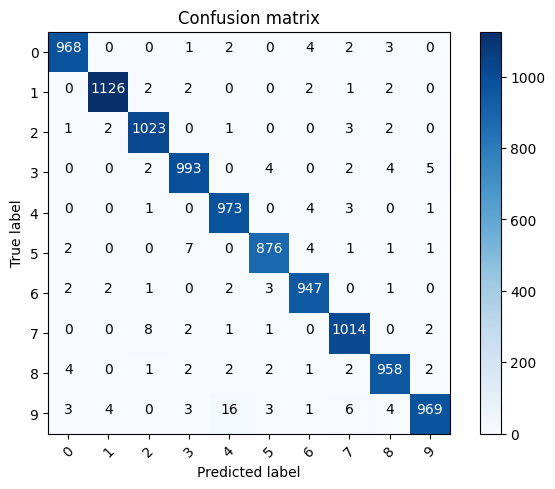

In [39]:
# Wahrheitsmatrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(10))


Plot of training error over 5 epochs:


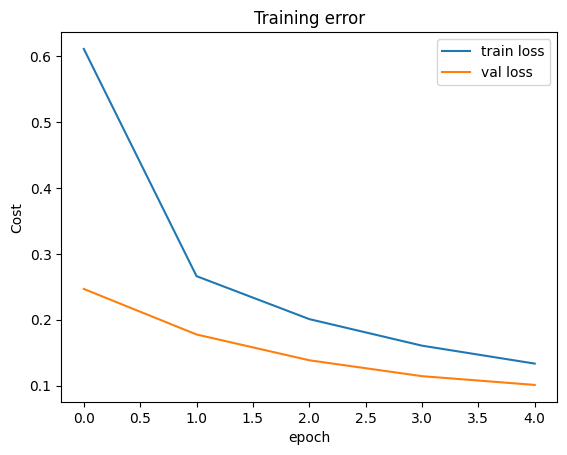

In [11]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()

In [12]:
#return model
history = model.fit(X_train, y_train,validation_data = [X_val,y_val],epochs=15)

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9662 - loss: 0.1173 - val_accuracy: 0.9744 - val_loss: 0.0875
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9707 - loss: 0.1013 - val_accuracy: 0.9790 - val_loss: 0.0787
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9738 - loss: 0.0918 - val_accuracy: 0.9796 - val_loss: 0.0767
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9759 - loss: 0.0824 - val_accuracy: 0.9802 - val_loss: 0.0683
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9774 - loss: 0.0768 - val_accuracy: 0.9812 - val_loss: 0.0659
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9800 - loss: 0.0692 - val_accuracy: 0.9824 - val_loss: 0.0625
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9811 - loss: 0.0632 - val_accuracy: 0.9840 - val_loss: 0.0589
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0574 - 

In [13]:
# Make prediction.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [15]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

Test set error rate: 0.0144



Plot of training error over 5 epochs:


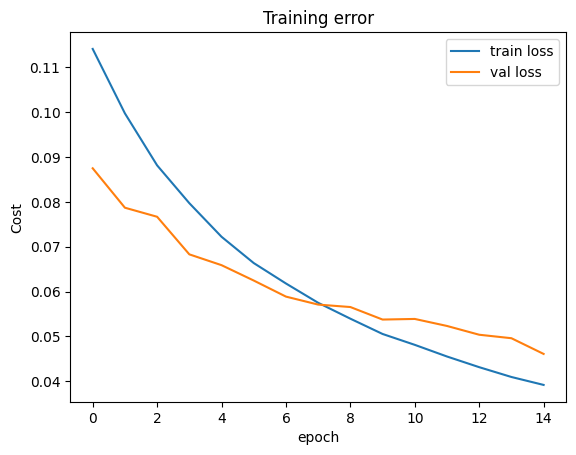

In [16]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()

In [17]:
#def LeNet_5():
model = Sequential() #model is sequential connected layers

# C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32,32,1), padding='valid'))

# P1: (None,28,28,6) -> (None,14,14,6).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')) #vaild means no padding, same means padding required
# C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# P2: (None,10,10,16) -> (None,5,5,16).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())
 
# FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='relu'))

# FC2: (None,120) -> (None,84).
model.add(Dense(84, activation='relu'))

# FC3: (None,84) -> (None,10).
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [18]:
history = model.fit(X_train, y_train,validation_data = [X_val,y_val],epochs=20)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4220 - loss: 1.7320 - val_accuracy: 0.9356 - val_loss: 0.2179
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9273 - loss: 0.2397 - val_accuracy: 0.9558 - val_loss: 0.1494
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9515 - loss: 0.1598 - val_accuracy: 0.9676 - val_loss: 0.1142
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9631 - loss: 0.1239 - val_accuracy: 0.9752 - val_loss: 0.0915
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9694 - loss: 0.0993 - val_accuracy: 0.9766 - val_loss: 0.0797
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9741 - loss: 0.0845 - val_accuracy: 0.9808 - val_loss: 0.0707
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0749 - val_accuracy: 0.9800 - val_loss: 0.0741
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9786 - loss: 0.0684 - 

In [19]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [21]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

Test set error rate: 0.0164



Plot of training error over 5 epochs:


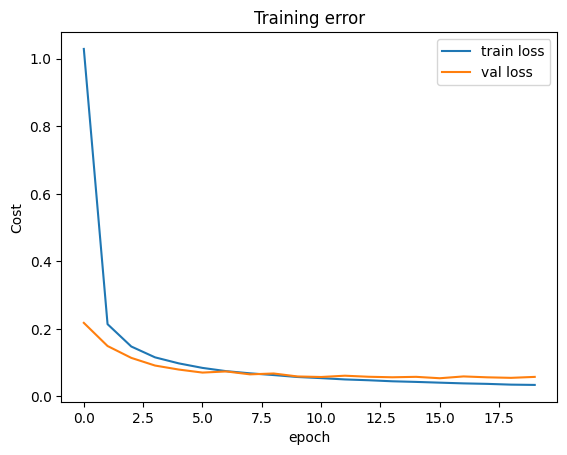

In [22]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()

In [23]:
#def LeNet_5():
model = Sequential() #model is sequential connected layers

# C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))
# P1: (None,28,28,6) -> (None,14,14,6).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')) #vaild means no padding, same means padding required

# C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# P2: (None,10,10,16) -> (None,5,5,16).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())
 
# FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='tanh'))
# FC2: (None,120) -> (None,84).
model.add(Dense(84, activation='tanh'))
# FC3: (None,32) -> (None,10).
model.add(Dense(32, activation='tanh'))
# FC3: (None,84) -> (None,10).
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [24]:
history = model.fit(X_train, y_train,validation_data = [X_val,y_val],epochs=20)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6856 - loss: 1.1383 - val_accuracy: 0.9286 - val_loss: 0.2953
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9106 - loss: 0.3256 - val_accuracy: 0.9508 - val_loss: 0.1946
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9348 - loss: 0.2305 - val_accuracy: 0.9592 - val_loss: 0.1488
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9498 - loss: 0.1767 - val_accuracy: 0.9654 - val_loss: 0.1237
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9574 - loss: 0.1501 - val_accuracy: 0.9690 - val_loss: 0.1121
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9631 - loss: 0.1287 - val_accuracy: 0.9726 - val_loss: 0.0988
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9686 - loss: 0.1100 - val_accuracy: 0.9752 - val_loss: 0.0878
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9707 - loss: 0.1005 - 

In [25]:
# Make prediction.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [27]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

Test set error rate: 0.0153



Plot of training error over 5 epochs:


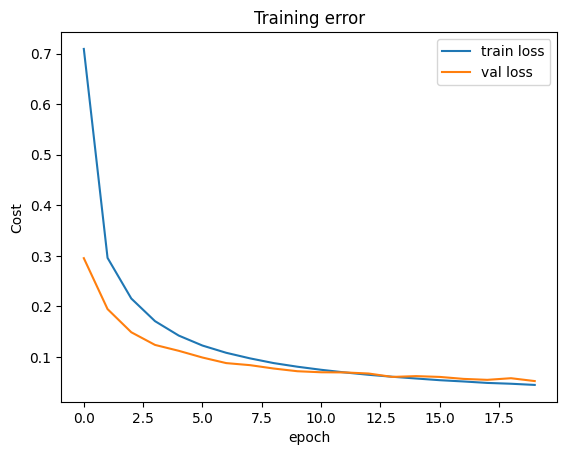

In [28]:
# Plot training error.
print('\nPlot of training error over 5 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()

In [ ]:
# case 5
# Nun mehr Kernel -> 99,2% Genauigkeit
# dauert ca 15 Min. auf Laptop
mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]


tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
# sparse_categorical_crossentropy wird verwendet, wenn die Ziel-Labels nicht One-Hot-codiert sind. Gegensatz zu categorical_crossentropy verwendet
# Nadam ist eine Kombination aus "Nesterov Accelerated Gradient" und "Adam". Konvergiert schnell.
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)
